In [1]:
import librosa
import numpy as np
from scipy.fftpack import dct
import os 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import wave
import math
import scipy.io.wavfile as wav
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import json
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import shuffle

## Define load & save functions

In [19]:
def load_data(path):
    with open(path, 'r') as file:
        data_dict = json.load(file)
    processed_data = data_dict['data']
    labels = data_dict['label']
    return processed_data, labels

In [63]:
def save_data(path, processed_data, labels):
    data_dict = {
        'data': [],
        'label': labels
    }
    for i in range(len(processed_data)):
        data_dict['data'].append(processed_data[i].tolist())
    with open(path, 'w') as file:
        json.dump(data_dict, file)


In [22]:
def load_model(path):
    with open(path, 'rb') as file:
        model = pickle.load(file)
    return model
model_path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\model\model_frame100ms.pkl"
model = load_model(model_path)

In [5]:
def save_model(model, path):
    with open(path, 'wb') as file:
        pickle.dump(model, file)

## Plot to see the ratio between two labels

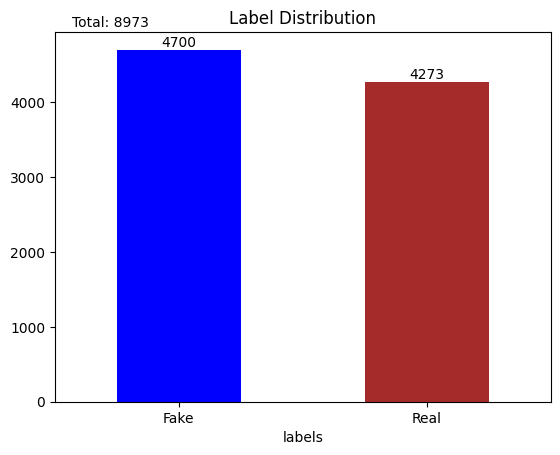

In [90]:
import matplotlib.pyplot as plt

# Get value counts
counts = df['labels'].value_counts()

# Create bar plot
colors = ['blue' if label == 1 else 'brown' for label in counts.index]
ax = counts.plot(kind='bar', color=colors)

# Annotate bars with their respective counts
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Annotate total count
total = counts.sum()
ax.annotate('Total: ' + str(total), xy=(0, 1), xytext=(12, 12), va='top',
             xycoords='axes fraction', textcoords='offset points')

# Rename the labels and set them horizontal
ax.set_xticklabels(['Real' if label == 1 else 'Fake' for label in ax.get_xticks()], rotation=0)
ax.set_title('Label Distribution')
# Display the plot
plt.show()

## To check all the accuracy of all models

In [69]:


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Create a list of classifiers
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(gamma=4),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(n_neighbors=2,weights='uniform'),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis()
]

# Train and evaluate each classifier
for classifier in classifiers:
    classifier.fit(X_test, y_test)
    y_pred = classifier.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    print(f"{classifier.__class__.__name__}: Accuracy = {accuracy}")

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: Accuracy = 0.8323684872892021
DecisionTreeClassifier: Accuracy = 0.9353133652152026
SVC: Accuracy = 0.9848980619179462
RandomForestClassifier: Accuracy = 0.9856531588220488


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier: Accuracy = 0.9252454064938334
KNeighborsClassifier: Accuracy = 0.990183740246665
GradientBoostingClassifier: Accuracy = 0.9667757362194815
LinearDiscriminantAnalysis: Accuracy = 0.870375031462371


Try boosting classifier

In [156]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

# Khởi tạo mô hình với các tham số từ file tham khảo
clf = LGBMClassifier(
    nthread=4,
    n_estimators=10000,
    learning_rate=0.02,
    num_leaves=128,
    colsample_bytree=0.9497036,
    subsample=0.8715623,
    max_depth=8,
    reg_alpha=0.041545473,
    reg_lambda=0.0735294,
    min_split_gain=0.0222415,
    min_child_weight=39.3259775,
    silent=-1,
    verbose=-1
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_macro_scores = []
processed_data = pd.DataFrame(processed_data)
labels = pd.DataFrame(labels)
for train_index, test_index in skf.split(processed_data, labels):
    X_train_fold, X_test_fold = processed_data.iloc[train_index], processed_data.iloc[test_index]
    y_train_fold, y_test_fold = labels.iloc[train_index], labels.iloc[test_index]

    clf.fit(X_train_fold, y_train_fold)

    y_pred_fold = clf.predict(X_test_fold)

    f1_macro_fold = f1_score(y_test_fold, y_pred_fold, average='macro')

    f1_macro_scores.append(f1_macro_fold)

for fold, f1_macro_score in enumerate(f1_macro_scores):
    print(f"Fold {fold+1} F1-macro:", f1_macro_score)

print("Average F1-macro:", np.mean(f1_macro_scores))


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Progr

Fold 1 F1-macro: 0.965879500441167
Fold 2 F1-macro: 0.972502330120951
Fold 3 F1-macro: 0.9649229334182403
Fold 4 F1-macro: 0.967736369910283
Fold 5 F1-macro: 0.9677655677655678
Average F1-macro: 0.967761340331242


## Function to draw chart report

In [6]:
import time

def data_for_chart(model):
    directory = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\processed"
    file_names = os.listdir(directory)
    svm_accu = []
    svm_pre = []
    svm_recall = []
    svm_f1 = []
    svm_time = []  # List to store time taken for each run
    for file_name in file_names:
        file_path = os.path.join(directory, file_name)
        processed_data, labels = load_data(file_path)
        df = pd.concat([pd.DataFrame(processed_data), pd.DataFrame(labels)], axis=1)
        df = shuffle(df)
        processed_data = df.iloc[:, :-1].values
        labels = df.iloc[:, -1].values
        f1_macro_scores_svm = []
        accuracy_scores_svm = []
        precision_svm = []
        recall_svm = []
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        processed_data = pd.DataFrame(processed_data)
        labels = pd.DataFrame(labels)
        for train_index, test_index in skf.split(processed_data, labels):
            X_train_fold, X_test_fold = processed_data.iloc[train_index], processed_data.iloc[test_index]
            y_train_fold, y_test_fold = labels.iloc[train_index], labels.iloc[test_index]
            clf = model
            start_time = time.time()  # Start time
            clf.fit(X_train_fold, y_train_fold)
            y_pred_fold = clf.predict(X_test_fold)
            end_time = time.time()  # End time
            svm_time.append(end_time - start_time)  # Append the time difference to the list
            f1_macro_fold = f1_score(y_test_fold, y_pred_fold, average='macro')
            f1_macro_scores_svm.append(f1_macro_fold)
            accuracy_scores_svm.append(accuracy_score(y_test_fold,y_pred_fold))
            recall_svm.append(recall_score(y_test_fold,y_pred_fold))
            precision_svm.append(precision_score(y_test_fold,y_pred_fold))
        svm_accu.append(np.mean(accuracy_scores_svm))
        svm_pre.append(np.mean(precision_svm))
        svm_recall.append(np.mean(recall_svm))
        svm_f1.append(np.mean(f1_macro_scores_svm))
    print(type(model).__name__)
    print("Accuracy: ", np.mean(svm_accu))
    print("Precision: ", np.mean(svm_pre))
    print("Recall: ", np.mean(svm_recall))
    print("F1: ", np.mean(svm_f1))
    print("Average computing time: ", np.mean(svm_time))  # Print the average computing time
    return svm_accu, svm_pre, svm_recall, svm_f1, svm_time  # Return the list of times
svm_accu,svm_pre,svm_recall,svm_f1,svm_time = data_for_chart(svm.SVC(C=2,gamma=3))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

SVC
Accuracy:  0.9896994855041326
Precision:  0.9924918306192642
Recall:  0.9878200209277992
F1:  0.9896789752263625
Average computing time:  2.792724763760801


In [7]:
knn_accu,knn_pre,knn_recall,knn_f1,knn_time= data_for_chart(KNeighborsClassifier(n_neighbors=2,weights='uniform'))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-package

KNeighborsClassifier
Accuracy:  0.9921275306310872
Precision:  0.9983872342494876
Recall:  0.986567840948727
F1:  0.9921144851751996
Average computing time:  0.14346682986275094


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
rf_accu,rf_pre,rf_recall,rf_f1,rf_time = data_for_chart(RandomForestClassifier(n_estimators = 200,criterion='log_loss',min_samples_leaf=2,min_samples_split=2))

In [9]:
lda_accu,lda_pre,lda_recall,lda_f1,lda_time = data_for_chart(LinearDiscriminantAnalysis(n_components=1,solver='svd'))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

LinearDiscriminantAnalysis
Accuracy:  0.8591658016162776
Precision:  0.8799686076112194
Recall:  0.8476002790373213
F1:  0.858996304658937
Average computing time:  0.051211254323115116


In [10]:
lg_accu,lg_pre,lg_recall,lg_f1,lg_time = data_for_chart(LogisticRegression(C=1,solver='liblinear',penalty='l1'))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

LogisticRegression
Accuracy:  0.853454826663684
Precision:  0.8709720985507206
Recall:  0.846093477502616
F1:  0.8532612505443629
Average computing time:  32.56364773844109


## Correct running time

In [ ]:
knn_t = []
lda_t = []
lg_t = []
svm_t = []
rf_t = []

for i in range(61):
    abc_knn = []
    abc_lda = []
    abc_lg = []
    abc_svm = []
    abc_rf = []
    for j in range(10):
        abc_knn.append(knn_time[j + i * 10])
        abc_lda.append(lda_time[j + i * 10])
        abc_lg.append(lg_time[j + i * 10])
        abc_svm.append(svm_time[j + i * 10])
        abc_rf.append(rf_time[j + i * 10])
    knn_t.append(np.mean(abc_knn))
    lda_t.append(np.mean(abc_lda))
    lg_t.append(np.mean(abc_lg))
    svm_t.append(np.mean(abc_svm))
    rf_t.append(np.mean(abc_rf))
print(knn_t)
print(lda_t)
print(lg_t)
print(svm_t)
print(rf_t)

## Save result to draw chart

In [24]:
def save_result_chart(path,accu,pre,recall,f1,timee):
    data = {
        'Accuracy': accu,
        'Precision': pre,
        'Recall': recall,
        'F1': f1,
        'time' : timee
    }
    df = pd.DataFrame(data)
    df.to_json(path)


path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\svm.json"
save_result_chart(path,svm_accu,svm_pre,svm_recall,svm_f1,svm_t)
path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\knn.json"
save_result_chart(path,knn_accu,knn_pre,knn_recall,knn_f1,knn_t)
path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\lda.json"
save_result_chart(path,lda_accu,lda_pre,lda_recall,lda_f1,lda_t)
path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\lg.json"
save_result_chart(path,lg_accu,lg_pre,lg_recall,lg_f1,lg_t)

In [ ]:
path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result\rf.json"
save_result_chart(path,rf_accu,rf_pre,rf_recall,rf_f1,rf_time)

In [2]:
def load_result_chart(path):
    with open(path, 'r') as file:
        data = json.load(file)
    accuracy = [a for a in data['Accuracy'].values()]
    precision = [a for a in data['Precision'].values()]
    recall = [a for a in data['Recall'].values()]
    f1 = [a for a in data['F1'].values()]
    time = [a for a in data['time'].values()]
    return accuracy,precision,recall,f1,time


In [3]:
rf_path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result_chart\rf.json"
rf_accu,rf_pre,rf_recall,rf_f1,rf_time = load_result_chart(rf_path)
svm_path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result_chart\svm.json"
svm_accu,svm_pre,svm_recall,svm_f1,svm_time = load_result_chart(svm_path)
knn_path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result_chart\knn.json"
knn_accu,knn_pre,knn_recall,knn_f1,knn_time = load_result_chart(knn_path)
lda_path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result_chart\lda.json"
lda_accu,lda_pre,lda_recall,lda_f1,lda_time= load_result_chart(lda_path)
lg_path = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result_chart\lg.json"
lg_accu,lg_pre,lg_recall,lg_f1,lg_time = load_result_chart(lg_path)

## Chart to plot inside report

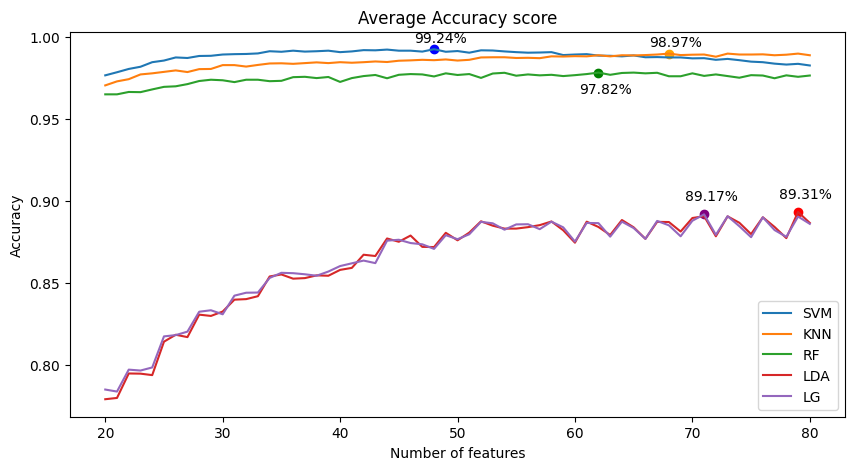

In [15]:
import numpy as np

# Find the index of the maximum value in each list
max_svm_index = np.argmax(svm_accu)
max_knn_index = np.argmax(knn_accu)
max_rf_index = np.argmax(rf_accu)
max_lda_index = np.argmax(lda_accu)
max_lg_index = np.argmax(lg_accu)

plt.figure(figsize=(10, 5)) 
# Plot the lines
plt.plot([i for i in range(20,81)],svm_accu,label='SVM')
plt.plot([i for i in range(20,81)],knn_accu,label='KNN')
plt.plot([i for i in range(20,81)],rf_accu,label='RF')
plt.plot([i for i in range(20,81)],lda_accu,label='LDA')
plt.plot([i for i in range(20,81)],lg_accu,label='LG')

# Mark the highest points
plt.scatter(max_svm_index + 20, svm_accu[max_svm_index], color='blue')
plt.scatter(max_knn_index + 20, knn_accu[max_knn_index], color='orange')
plt.scatter(max_rf_index + 20, rf_accu[max_rf_index], color='green')
plt.scatter(max_lda_index + 20, lda_accu[max_lda_index], color='red')
plt.scatter(max_lg_index + 20, lg_accu[max_lg_index], color='purple')

# Annotate the highest points
plt.annotate(f'{round(svm_accu[max_svm_index],4)*100}%', (max_svm_index + 20, svm_accu[max_svm_index]), textcoords="offset points", xytext=(5,5), ha='center')
plt.annotate(f'{round(knn_accu[max_knn_index],4)*100}%', (max_knn_index + 20, knn_accu[max_knn_index]), textcoords="offset points", xytext=(5,5), ha='center')  # Adjusted for KNN
plt.annotate(f'{round(rf_accu[max_rf_index],4)*100}%', (max_rf_index + 20, rf_accu[max_rf_index]), textcoords="offset points", xytext=(5,-15), ha='center')
plt.annotate(f'{round(lda_accu[max_lda_index],4)*100}%', (max_lda_index + 20, lda_accu[max_lda_index]), textcoords="offset points", xytext=(5,10), ha='center')
plt.annotate(f'{round(lg_accu[max_lg_index],4)*100}%', (max_lg_index + 20, lg_accu[max_lg_index]), textcoords="offset points", xytext=(5,10), ha='center')

plt.title('Average Accuracy score')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

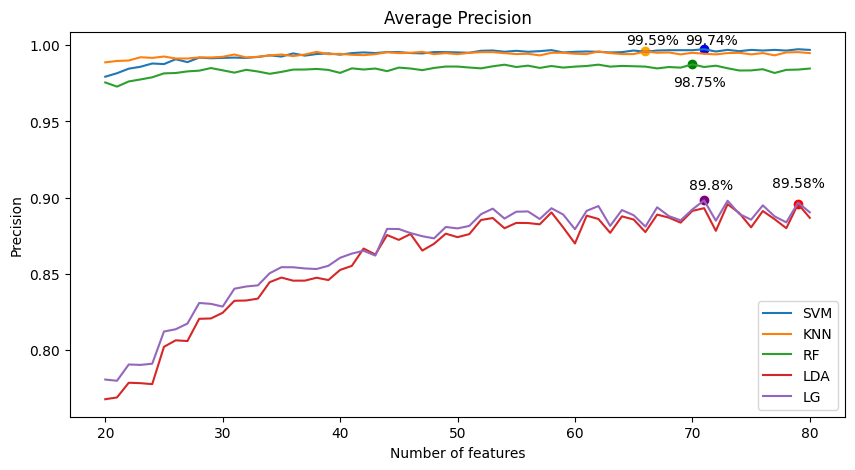

In [27]:
import numpy as np

# Find the index of the maximum value in each list
max_svm_index = np.argmax(svm_pre)
max_knn_index = np.argmax(knn_pre)
max_rf_index = np.argmax(rf_pre)
max_lda_index = np.argmax(lda_pre)
max_lg_index = np.argmax(lg_pre)
plt.figure(figsize=(10, 5)) 
# Plot the lines
plt.plot([i for i in range(20,81)],svm_pre,label='SVM')
plt.plot([i for i in range(20,81)],knn_pre,label='KNN')
plt.plot([i for i in range(20,81)],rf_pre,label='RF')
plt.plot([i for i in range(20,81)],lda_pre,label='LDA')
plt.plot([i for i in range(20,81)],lg_pre,label='LG')

# Mark the highest points
plt.scatter(max_svm_index + 20, svm_pre[max_svm_index], color='blue')
plt.scatter(max_knn_index + 20, knn_pre[max_knn_index], color='orange')
plt.scatter(max_rf_index + 20, rf_pre[max_rf_index], color='green')
plt.scatter(max_lda_index + 20, lda_pre[max_lda_index], color='red')
plt.scatter(max_lg_index + 20, lg_pre[max_lg_index], color='purple')

# Annotate the highest points
plt.annotate(f'{round(svm_pre[max_svm_index],4)*100}%', (max_svm_index + 20, svm_accu[max_svm_index]), textcoords="offset points", xytext=(5,15), ha='center')
plt.annotate(f'{round(knn_pre[max_knn_index],4)*100}%', (max_knn_index + 20, knn_accu[max_knn_index]), textcoords="offset points", xytext=(5,13), ha='center')  # Adjusted for KNN
plt.annotate(f'{round(rf_pre[max_rf_index],4)*100}%', (max_rf_index + 20, rf_accu[max_rf_index]), textcoords="offset points", xytext=(5,-5), ha='center')
plt.annotate(f'{round(lda_pre[max_lda_index],4)*100}%', (max_lda_index + 20, lda_accu[max_lda_index]), textcoords="offset points", xytext=(0,15), ha='center')
plt.annotate(f'{round(lg_pre[max_lg_index],3)*100}%', (max_lg_index + 20, lg_accu[max_lg_index]), textcoords="offset points", xytext=(5,15), ha='center')

plt.title('Average Precision')
plt.xlabel('Number of features')
plt.ylabel('Precision')
plt.legend()
plt.show()

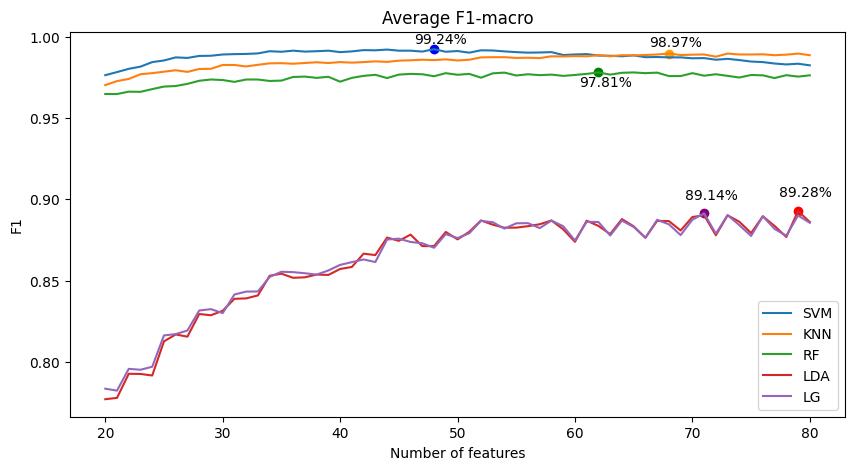

In [39]:
import numpy as np

# Find the index of the maximum value in each list
max_svm_index = np.argmax(svm_f1)
max_knn_index = np.argmax(knn_f1)
max_rf_index = np.argmax(rf_f1)
max_lda_index = np.argmax(lda_f1)
max_lg_index = np.argmax(lg_f1)
plt.figure(figsize=(10, 5)) 
# Plot the lines
plt.plot([i for i in range(20,81)],svm_f1,label='SVM')
plt.plot([i for i in range(20,81)],knn_f1,label='KNN')
plt.plot([i for i in range(20,81)],rf_f1,label='RF')
plt.plot([i for i in range(20,81)],lda_f1,label='LDA')
plt.plot([i for i in range(20,81)],lg_f1,label='LG')

# Mark the highest points
plt.scatter(max_svm_index + 20, svm_f1[max_svm_index], color='blue')
plt.scatter(max_knn_index + 20, knn_f1[max_knn_index], color='orange')
plt.scatter(max_rf_index + 20, rf_f1[max_rf_index], color='green')
plt.scatter(max_lda_index + 20, lda_f1[max_lda_index], color='red')
plt.scatter(max_lg_index + 20, lg_f1[max_lg_index], color='purple')

# Annotate the highest points
plt.annotate(f'{round(svm_f1[max_svm_index],4)*100}%', (max_svm_index + 20, svm_accu[max_svm_index]), textcoords="offset points", xytext=(5,4), ha='center')
plt.annotate(f'{round(knn_f1[max_knn_index],4)*100}%', (max_knn_index + 20, knn_accu[max_knn_index]), textcoords="offset points", xytext=(5,5), ha='center')  # Adjusted for KNN
plt.annotate(f'{round(rf_f1[max_rf_index],4)*100}%', (max_rf_index + 20, rf_accu[max_rf_index]), textcoords="offset points", xytext=(5,-10), ha='center')
plt.annotate(f'{round(lda_f1[max_lda_index],4)*100}%', (max_lda_index + 20, lda_accu[max_lda_index]), textcoords="offset points", xytext=(5,10), ha='center')
plt.annotate(f'{round(lg_f1[max_lg_index],4)*100}%', (max_lg_index + 20, lg_accu[max_lg_index]), textcoords="offset points", xytext=(5,10), ha='center')

plt.title('Average F1-macro')
plt.xlabel('Number of features')
plt.ylabel('F1')
plt.legend()
plt.show()

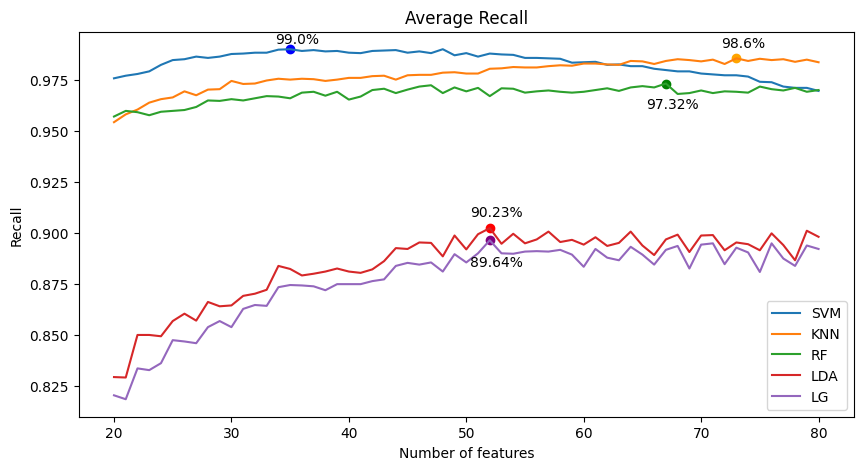

In [62]:
import numpy as np

# Find the index of the maximum value in each list
max_svm_index = np.argmax(svm_recall)
max_knn_index = np.argmax(knn_recall)
max_rf_index = np.argmax(rf_recall)
max_lda_index = np.argmax(lda_recall)
max_lg_index = np.argmax(lg_recall)
plt.figure(figsize=(10, 5)) 
# Plot the lines
plt.plot([i for i in range(20,81)],svm_recall,label='SVM')
plt.plot([i for i in range(20,81)],knn_recall,label='KNN')
plt.plot([i for i in range(20,81)],rf_recall,label='RF')
plt.plot([i for i in range(20,81)],lda_recall,label='LDA')
plt.plot([i for i in range(20,81)],lg_recall,label='LG')

# Mark the highest points
plt.scatter(max_svm_index + 20, svm_recall[max_svm_index], color='blue')
plt.scatter(max_knn_index + 20, knn_recall[max_knn_index], color='orange')
plt.scatter(max_rf_index + 20, rf_recall[max_rf_index], color='green')
plt.scatter(max_lda_index + 20, lda_recall[max_lda_index], color='red')
plt.scatter(max_lg_index + 20, lg_recall[max_lg_index], color='purple')

# Annotate the highest points
# Annotate the highest points
plt.annotate(f'{round(svm_recall[max_svm_index],4)*100}%', (max_svm_index + 20, svm_accu[max_svm_index]), textcoords="offset points", xytext=(5,3), ha='center')
plt.annotate(f'{round(knn_recall[max_knn_index],3)*100}%', (max_knn_index + 20, knn_accu[max_knn_index]), textcoords="offset points", xytext=(5,2), ha='center')  # Adjusted for KNN
plt.annotate(f'{round(rf_recall[max_rf_index],4)*100}%', (max_rf_index + 20, rf_accu[max_rf_index]), textcoords="offset points", xytext=(5,-25), ha='center')
plt.annotate(f'{round(lda_recall[max_lda_index],4)*100}%', (max_lda_index + 20, lda_accu[max_lda_index]), textcoords="offset points", xytext=(5,30), ha='center')
plt.annotate(f'{round(lg_recall[max_lg_index],4)*100}%', (max_lg_index + 20, lg_accu[max_lg_index]), textcoords="offset points", xytext=(5,-5), ha='center')

plt.title('Average Recall')
plt.xlabel('Number of features')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Find the index of the maximum value in each list
max_svm_index = np.argmax(svm_t)
max_knn_index = np.argmax(knn_t)
max_rf_index = np.argmax(rf_t)
max_lda_index = np.argmax(lda_t)
max_lg_index = np.argmax(lg_t)

plt.figure(figsize=(10, 5)) 

# Plot the lines
plt.plot([i for i in range(20,81)],svm_t,label='SVM')
plt.plot([i for i in range(20,81)],knn_t,label='KNN')
plt.plot([i for i in range(20,81)],rf_t,label='RF')
plt.plot([i for i in range(20,81)],lda_t,label='LDA')
plt.plot([i for i in range(20,81)],lg_t,label='LG')

# Mark the highest points
plt.scatter(max_svm_index + 20, svm_t[max_svm_index], color='blue')
plt.scatter(max_knn_index + 20, knn_t[max_knn_index], color='orange')
plt.scatter(max_rf_index + 20, rf_t[max_rf_index], color='green')
plt.scatter(max_lda_index + 20, lda_t[max_lda_index], color='red')
plt.scatter(max_lg_index + 20, lg_t[max_lg_index], color='purple')

# Annotate the highest points
plt.annotate(f'{round(svm_t[max_svm_index],3)}', (max_svm_index + 20, svm_t[max_svm_index]), textcoords="offset points", xytext=(5,8), ha='center')
plt.annotate(f'{round(knn_t[max_knn_index],3)}', (max_knn_index + 20, knn_t[max_knn_index]), textcoords="offset points", xytext=(0,8), ha='center')  # Adjusted for KNN
plt.annotate(f'{round(rf_t[max_rf_index],3)}', (max_rf_index + 20, rf_t[max_rf_index]), textcoords="offset points", xytext=(5,5), ha='center')
plt.annotate(f'{round(lda_t[max_lda_index],3)}', (max_lda_index + 20, lda_t[max_lda_index]), textcoords="offset points", xytext=(-10,-10), ha='center')
plt.annotate(f'{round(lg_t[max_lg_index],3)}', (max_lg_index + 20, lg_t[max_lg_index]), textcoords="offset points", xytext=(0,0), ha='center')

plt.title('Average Time')
plt.xlabel('Number of features')
plt.ylabel('Time')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler
from scipy.fftpack import dct

def preprocessing(audio_file, frame_length):
    # Load the audio signal
    y, sr = librosa.load(audio_file, sr=None)

    # Step 1: Pre-emphasis
    pre_emphasis_coeff = 0.97
    y_filt = librosa.effects.preemphasis(y, coef=pre_emphasis_coeff)

    # Step 2: Frame blocking
    frame_length = frame_length # 25 ms
    hop_length = 0.01  # 10 ms
    frame_length_samples = int(frame_length * sr)
    hop_length_samples = int(hop_length * sr)
    frames = librosa.util.frame(y_filt, frame_length=frame_length_samples, hop_length=hop_length_samples).T

    # Step 3: Windowing
    window = np.hamming(frame_length_samples)
    windowed_frames = frames * window

    # Step 4: Fast Fourier Transform (FFT)
    fft_size = 2048
    spectrogram = np.abs(np.fft.rfft(windowed_frames, n=fft_size))

    # Step 5: Mel frequency wrapping
    n_mels = 40  # Adjusted number of Mel bands
    mel_spec = librosa.feature.melspectrogram(S=spectrogram.T, sr=sr, n_mels=n_mels)

    # Step 6: Log Mel Spectrogram
    log_mel_spec = librosa.power_to_db(mel_spec)
    
    # Step 7: Discrete Cosine Transform (DCT) to get DCT features
    dct_features = dct(log_mel_spec, type=2, axis=0, norm='ortho')[:68]
    
    mean_dct = np.mean(dct_features, axis=1)

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Reshape the aggregated DCTs to 2D (needed for fitting the scaler)
    mean_dct_reshaped = mean_dct.reshape(-1, 1)

    # Fit and transform the data
    mean_dct_scaled = scaler.fit_transform(mean_dct_reshaped)

    # Flatten the scaled data back to 1D
    mean_dct_scaled_flat = mean_dct_scaled.flatten()

    return mean_dct_scaled_flat

frame_lenght = 0.2
for i in range(1,31):
    url = r"path/to/load"
    files, labels = load_data_ult(url)
    files = [preprocessing(file,i) for file in files]
    url = f"path/to/leng{frame_lenght}"
    save_data(url,files,labels)
    print(f"Save data succeed: {url}")

In [21]:
import time

def data_for_frame_chart(model):
    directory = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\frame_length_data"
    file_names = os.listdir(directory)
    svm_accu = []
    i =0
    for file_name in file_names:
        file_path = os.path.join(directory, file_name)
        processed_data, labels = load_data(file_path)
        df = pd.concat([pd.DataFrame(processed_data), pd.DataFrame(labels)], axis=1)
        df = shuffle(df)
        processed_data = df.iloc[:, :-1].values
        labels = df.iloc[:, -1].values
        accuracy_scores_svm = []
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        processed_data = pd.DataFrame(processed_data)
        labels = pd.DataFrame(labels)
        for train_index, test_index in skf.split(processed_data, labels):
            X_train_fold, X_test_fold = processed_data.iloc[train_index], processed_data.iloc[test_index]
            y_train_fold, y_test_fold = labels.iloc[train_index], labels.iloc[test_index]
            clf = model
            clf.fit(X_train_fold, y_train_fold)
            y_pred_fold = clf.predict(X_test_fold)
            accuracy_scores_svm.append(accuracy_score(y_test_fold,y_pred_fold))
        svm_accu.append(np.mean(accuracy_scores_svm))
        i+=1
        print(i)
    print(type(model).__name__)
    print("Accuracy: ", np.mean(svm_accu))
    return svm_accu
svm_accu = data_for_frame_chart(svm.SVC(C=2,gamma=3))
# knn_accu= data_for_frame_chart(KNeighborsClassifier(n_neighbors=2,weights='uniform'))
# rf_accu = data_for_frame_chart(RandomForestClassifier(n_estimators = 200,criterion='log_loss',min_samples_leaf=2,min_samples_split=2))
# lda_accu = data_for_frame_chart(LinearDiscriminantAnalysis(n_components=1,solver='svd'))
# lg_accu = data_for_frame_chart(LogisticRegression(C=1,solver='liblinear',penalty='l1'))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

1


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

2


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

3


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

4


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

5


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

6


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

7


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

8


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

9


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

10


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

11


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

12


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

13


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

14


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

15


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

16


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

17


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

18


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

19


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

20


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

21


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

22


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

23


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

24


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

25


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

26


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

27


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

28


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

29


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

30
SVC
Accuracy:  0.9869203953788054


In [ ]:
knn_accu= data_for_frame_chart(KNeighborsClassifier(n_neighbors=2,weights='uniform'))
rf_accu = data_for_frame_chart(RandomForestClassifier(n_estimators = 200,criterion='log_loss',min_samples_leaf=2,min_samples_split=2))
lda_accu = data_for_frame_chart(LinearDiscriminantAnalysis(n_components=1,solver='svd'))
lg_accu = data_for_frame_chart(LogisticRegression(C=1,solver='liblinear',penalty='l1'))

In [30]:
rf_accu = data_for_frame_chart(RandomForestClassifier(n_estimators = 200,criterion='log_loss',min_samples_leaf=2,min_samples_split=2))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

1


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

2


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

3


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

4


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

5


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

6


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

7


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

8


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

9


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

10


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

11


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

12


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

13


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

14


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\sit

In [27]:
lda_accu = data_for_frame_chart(LinearDiscriminantAnalysis(n_components=1,solver='svd'))

c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

1


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

2


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

3


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

4


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

5


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

6


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

7


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

8


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

9


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

10


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

11


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

12


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

13


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

14


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

15


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

16


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

17


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

18


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

19


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

20


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

21


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

22


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

23


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

24


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

25


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

26


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

27


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

28


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

29


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-pack

30
LinearDiscriminantAnalysis
Accuracy:  0.846383858924287


c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\VIET HOANG - VTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lg_accu = data_for_frame_chart(LogisticRegression(C=1,solver='liblinear',penalty='l1'))

In [2]:
def save_result_frame_chart(path,accu):
    data = {
        'Accuracy': accu,
    }
    df = pd.DataFrame(data)
    df.to_json(path)
def load_result_frame_chart(path):
    with open(path, 'r') as file:
        data = json.load(file)
    accuracy = [a for a in data['Accuracy'].values()]
    return accuracy

In [3]:
svm_accu = load_result_frame_chart(r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result_frame\svm_frame.json")
knn_accu = load_result_frame_chart(r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result_frame\knn_frame.json")
rf_accu = load_result_frame_chart(r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result_frame\rf_frame.json")
lda_accu = load_result_frame_chart(r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result_frame\lda_frame.json")
lg_accu = load_result_frame_chart(r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\result_frame\lg_frame.json")

## Draw accuracy chart base on frame length

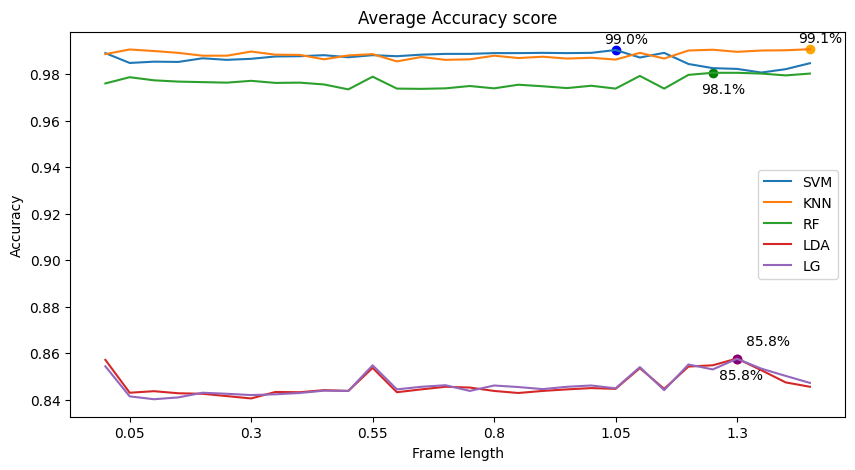

In [27]:
import numpy as np

# Find the index of the maximum value in each list
max_svm_index = np.argmax(svm_accu)
max_knn_index = np.argmax(knn_accu)
max_rf_index = np.argmax(rf_accu)
max_lda_index = np.argmax(lda_accu)
max_lg_index = np.argmax(lg_accu)

plt.figure(figsize=(10, 5)) 
# Plot the lines
plt.plot([str(i*0.05) for i in range(1,31)],svm_accu,label='SVM')
plt.plot([str(i*0.05) for i in range(1,31)],knn_accu,label='KNN')
plt.plot([str(i*0.05) for i in range(1,31)],rf_accu,label='RF')
plt.plot([str(i*0.05) for i in range(1,31)],lda_accu,label='LDA')
plt.plot([str(i*0.05) for i in range(1,31)],lg_accu,label='LG')

# Mark the highest points
plt.scatter(max_svm_index , svm_accu[max_svm_index], color='blue')
plt.scatter(max_knn_index , knn_accu[max_knn_index], color='orange')
plt.scatter(max_rf_index , rf_accu[max_rf_index], color='green')
plt.scatter(max_lda_index , lda_accu[max_lda_index], color='red')
plt.scatter(max_lg_index , lg_accu[max_lg_index], color='purple')

# Annotate the highest points
plt.annotate(f'{round(svm_accu[max_svm_index],3)*100}%', (max_svm_index + 1, svm_accu[max_svm_index]), textcoords="offset points", xytext=(-10,5), ha='center')
plt.annotate(f'{round(knn_accu[max_knn_index],3)*100}%', (max_knn_index + 1, knn_accu[max_knn_index]), textcoords="offset points", xytext=(-10,5), ha='center')  # Adjusted for KNN
plt.annotate(f'{round(rf_accu[max_rf_index],3)*100}%', (max_rf_index + 1, rf_accu[max_rf_index]), textcoords="offset points", xytext=(-10,-15), ha='center')
plt.annotate(f'{round(lda_accu[max_lda_index],3)*100}%', (max_lda_index + 1, lda_accu[max_lda_index]), textcoords="offset points", xytext=(-15,-15), ha='center')
plt.annotate(f'{round(lg_accu[max_lg_index],3)*100}%', (max_lg_index + 1, lg_accu[max_lg_index]), textcoords="offset points", xytext=(5,10), ha='center')

xtick_labels = [str(round(i*0.05,2)) for i in range(1, 31)][::5]  # Lấy mỗi nhãn thứ 5
xtick_positions = list(range(1, 31))[::5]  # Lấy vị trí tương ứng với nhãn
plt.xticks(ticks=xtick_positions, labels=xtick_labels)

plt.title('Average Accuracy score')
plt.xlabel('Frame length')
plt.ylabel('Accuracy')
plt.legend()
plt.show()